# 预训练语义分割模型预测-单张图像

同济子豪兄：https://space.bilibili.com/1900783

2022-10-18

## 进入 mmsegmentation 主目录

In [1]:
import os
os.chdir('mmsegmentation')

## 导入工具包

In [2]:
import numpy as np

## 下载预训练模型

Model Zoo：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/model_zoo.md

In [2]:
# 从 Model Zoo 获取 PSPNet 预训练模型，下载并保存在 checkpoint 文件夹中
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_80k_cityscapes/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth -P checkpoint


--2022-10-18 21:25:10--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_80k_cityscapes/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 196205947 (187M) [application/octet-stream]
正在保存至: “checkpoint/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth”

pspnet_r50-d8_512x1 100%[===================>] 187.12M  21.4MB/s    用时 8.9s    

2022-10-18 21:25:22 (21.1 MB/s) - 已保存 “checkpoint/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth” [196205947/196205947])




## Cityscapes数据集

19个类别
'road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
'bicycle'

## 载入测试图像

In [3]:
from PIL import Image
img_path = 'demo/demo.png'
img_pil = Image.open(img_path)

In [4]:
img_pil.size

(1024, 512)

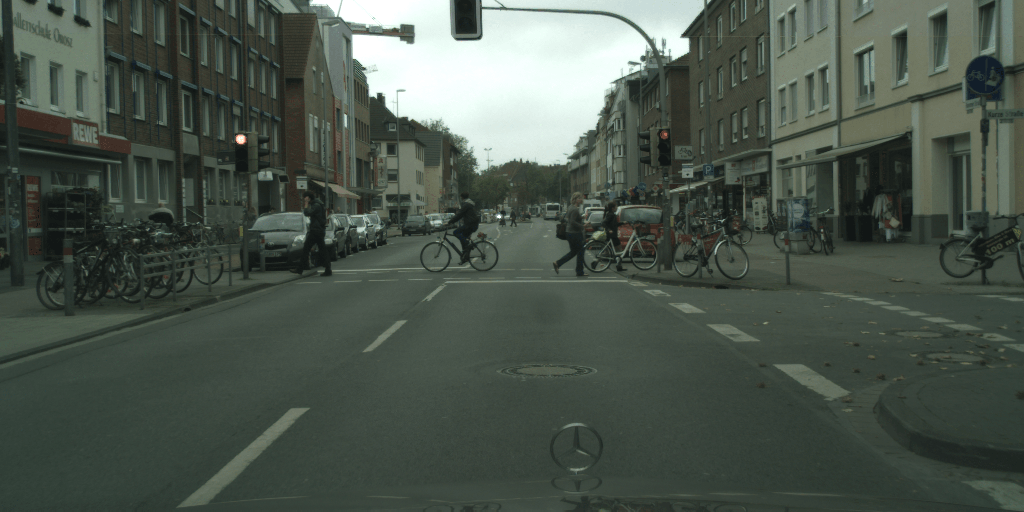

In [5]:
img_pil

## 载入模型

In [7]:
# 模型 config 配置文件
config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_80k_cityscapes.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'checkpoint/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth'

In [8]:
from mmseg.apis import init_segmentor
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/home/featurize/work/MMSegmentation教程/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: checkpoint/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth


## 运行语义分割预测

In [9]:
from mmseg.apis import inference_segmentor

img_path = 'demo/demo.png'
result = inference_segmentor(model, img_path)

In [10]:
result[0]

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
result[0].shape

(512, 1024)

In [12]:
np.unique(result[0])

array([ 0,  1,  2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18])

## 可视化语义分割预测结果-方法一

opacity控制透明度，越小，越接近原图。

In [24]:
model.show_result(img_path, result, out_file='outputs/B1.jpg', opacity=0.1)

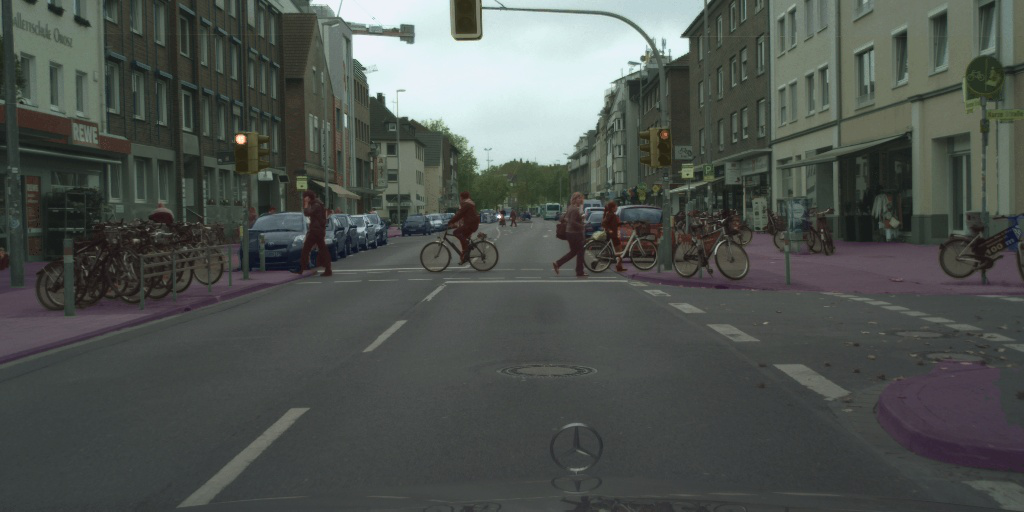

In [25]:
Image.open('outputs/B1.jpg')

## 可视化语义分割预测结果-方法二

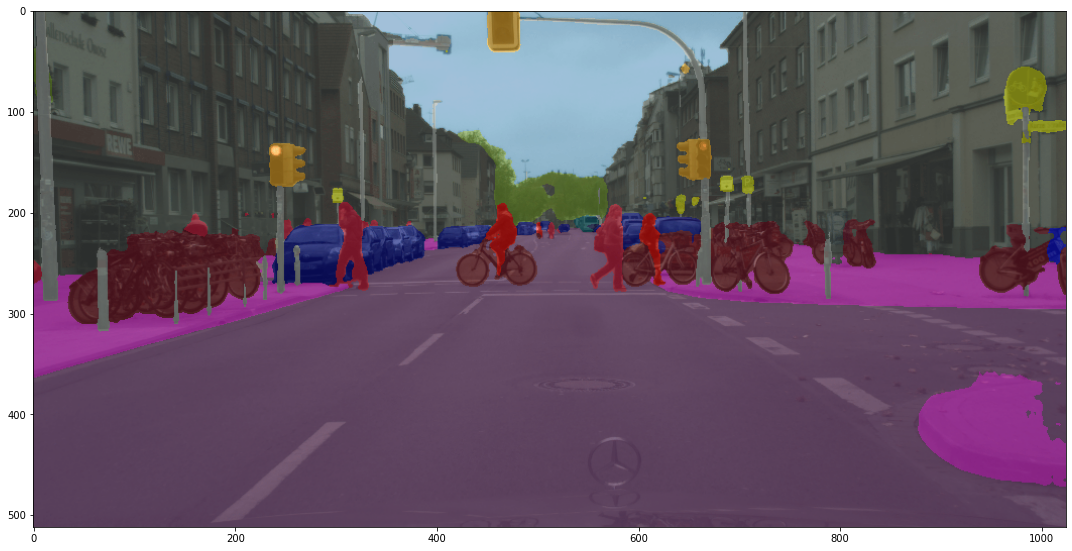

In [19]:
from mmseg.apis import show_result_pyplot
from mmseg.core.evaluation import get_palette

show_result_pyplot(model, img_path, result, get_palette('cityscapes'))

## 可视化语义分割预测结果-方法三

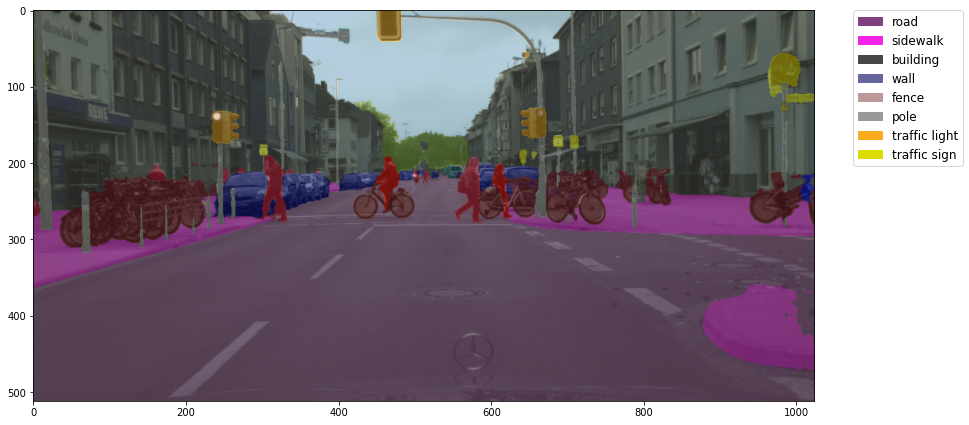

In [20]:
# 可视化分割图
from mmseg.datasets import CityscapesDataset
import numpy as np
import mmcv 

# 获取类别名和调色板
classes = CityscapesDataset.CLASSES
palette = CityscapesDataset.PALETTE

# 将分割图按调色板染色
seg_map = result[0].astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 8))
im = plt.imshow(((np.array(seg_img.convert('RGB')))*0.4 + mmcv.imread('demo/demo.png')*0.6) / 255)

# 为每一种颜色创建一个图例
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(8)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()